<a href="https://colab.research.google.com/github/Enamul-Hoq/Applied-Deep-Learning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28)


In [12]:
#As the data is only 2D than is why for CNN we need to make it 3D channels
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [13]:
# K is the number of classes|| number of unique elements
K = len(set(y_train))
print("K is the number of classes = ",K)

K is the number of classes =  10


In [14]:
# Building the CNN model. This model is for the single input and a single output 
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides= 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides= 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides= 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)
model = Model(i,x)


In [15]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 15)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5225 - accuracy: 0.8073 - val_loss: 0.3995 - val_accuracy: 0.8507
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3537 - accuracy: 0.8679 - val_loss: 0.3599 - val_accuracy: 0.8676
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3052 - accuracy: 0.8862 - val_loss: 0.3155 - val_accuracy: 0.8826
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2714 - accuracy: 0.8996 - val_loss: 0.2933 - val_accuracy: 0.8904
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2484 - accuracy: 0.9058 - val_loss: 0.2908 - val_accuracy: 0.8920
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2268 - accuracy: 0.9147 - val_loss: 0.3087 - val_accuracy: 0.8896
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2109 - accuracy: 0.9204 - val_loss: 0.2914 - val_accurac

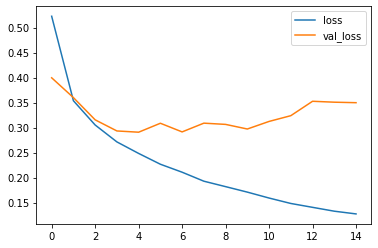

In [17]:
#Plotting the loss per iteration 
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

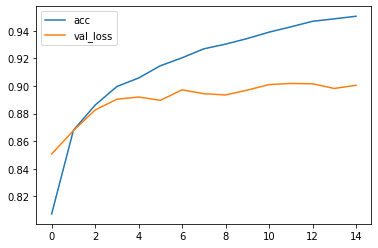

In [18]:
# Plotting accuracy per iteration 
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_loss')
plt.legend()